# Flower Classification model

In [1]:
import os
import pandas as pd
from pathlib import Path

# Defining the root directory of training dataset
train_dir = "/kaggle/input/flower-classification/flowers/flowers/flower_photos/train"

# Defining the root directory of validation dataset
validate_dir = "/kaggle/input/flower-classification/flowers/flowers/flower_photos/validation"

# Supported image file extensions
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']

# Function to collect image paths and labels from a directory
def collect_images_and_labels(directory):
    image_paths = []
    labels = []
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for root, _, files in os.walk(class_dir):
                for file in files:
                    if any(file.lower().endswith(ext) for ext in image_extensions):
                        image_paths.append(os.path.join(root, file))
                        labels.append(class_name)
    return image_paths, labels

# Collect images and labels for the training dataset
train_image_paths, train_labels = collect_images_and_labels(train_dir)

# Create a DataFrame for the training dataset
train_df = pd.DataFrame({
    'Image_Path': train_image_paths,
    'Flowers': train_labels
})

# Collect images and labels for the validation dataset
validate_image_paths, validate_labels = collect_images_and_labels(validate_dir)

# Create a DataFrame for the validation dataset
validate_df = pd.DataFrame({
    'Image_Path': validate_image_paths,
    'Flowers': validate_labels
})

# Display the first few rows of each DataFrame
print("Training Dataset:")
print(train_df.head())
print("\nValidation Dataset:")
print(validate_df.head())

# Save the DataFrames to CSV files
train_df.to_csv('/kaggle/working/train_dataset.csv', index=False)
validate_df.to_csv('/kaggle/working/validate_dataset.csv', index=False)

print("Training dataset saved to train_dataset.csv")
print("Validation dataset saved to validate_dataset.csv")

Training Dataset:
                                          Image_Path    Flowers
0  /kaggle/input/flower-classification/flowers/fl...  dandelion
1  /kaggle/input/flower-classification/flowers/fl...  dandelion
2  /kaggle/input/flower-classification/flowers/fl...  dandelion
3  /kaggle/input/flower-classification/flowers/fl...  dandelion
4  /kaggle/input/flower-classification/flowers/fl...  dandelion

Validation Dataset:
                                          Image_Path    Flowers
0  /kaggle/input/flower-classification/flowers/fl...  dandelion
1  /kaggle/input/flower-classification/flowers/fl...  dandelion
2  /kaggle/input/flower-classification/flowers/fl...  dandelion
3  /kaggle/input/flower-classification/flowers/fl...  dandelion
4  /kaggle/input/flower-classification/flowers/fl...  dandelion
Training dataset saved to train_dataset.csv
Validation dataset saved to validate_dataset.csv


## lets look at training dataset

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  3540 non-null   object
 1   Flowers     3540 non-null   object
dtypes: object(2)
memory usage: 55.4+ KB


### Looking at image

Image Size:(500, 333)


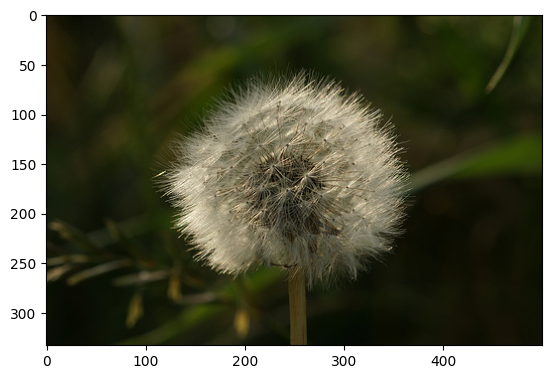

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

def first_image():
    first_image_path = train_df['Image_Path'].iloc[0]
    image = Image.open(first_image_path)
    print(f"Image Size:{image.size}")
    plt.imshow(image)
    plt.show()

first_image()

### removing courrupted images

In [4]:
from PIL import Image

def is_valid_image(Image_Path):
    try:
        img = Image.open(Image_Path)
        img.verify()
        return True
        
    except(IOError, SyntaxError):
        return False

train_df = train_df[train_df['Image_Path'].apply(is_valid_image)]
train_df

,Image_Path,Flowers
0,/kaggle/input/flower-classification/flowers/fl...,dandelion
1,/kaggle/input/flower-classification/flowers/fl...,dandelion
2,/kaggle/input/flower-classification/flowers/fl...,dandelion
3,/kaggle/input/flower-classification/flowers/fl...,dandelion
4,/kaggle/input/flower-classification/flowers/fl...,dandelion
...,...,...
3535,/kaggle/input/flower-classification/flowers/fl...,tulips
3536,/kaggle/input/flower-classification/flowers/fl...,tulips
3537,/kaggle/input/flower-classification/flowers/fl...,tulips
3538,/kaggle/input/flower-classification/flowers/fl...,tulips


### Removing Duplicate Images:

In [5]:
from imagehash import average_hash

def compute_hash(Image_Path):
    img = Image.open(Image_Path)
    return average_hash(img)

train_df['image_hash'] = train_df['Image_Path'].apply(compute_hash) 
train_df = train_df.drop_duplicates(subset=["image_hash"])
train_df = train_df.drop(columns=["image_hash"])

train_df

,Image_Path,Flowers
0,/kaggle/input/flower-classification/flowers/fl...,dandelion
1,/kaggle/input/flower-classification/flowers/fl...,dandelion
2,/kaggle/input/flower-classification/flowers/fl...,dandelion
3,/kaggle/input/flower-classification/flowers/fl...,dandelion
4,/kaggle/input/flower-classification/flowers/fl...,dandelion
...,...,...
3535,/kaggle/input/flower-classification/flowers/fl...,tulips
3536,/kaggle/input/flower-classification/flowers/fl...,tulips
3537,/kaggle/input/flower-classification/flowers/fl...,tulips
3538,/kaggle/input/flower-classification/flowers/fl...,tulips


### Resize Images

In [6]:
from PIL import Image
import numpy as np

def resize_image(Image_Path, size=(224, 224)):
    img = Image.open(Image_Path)
    img = img.resize(size)
    return np.array(img)

train_df['image'] = train_df["Image_Path"].apply(resize_image)

train_df

,Image_Path,Flowers,image
0,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[38, 30, 11], [37, 29, 10], [35, 28, 9], [33..."
1,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[158, 162, 163], [160, 164, 167], [162, 165,..."
2,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[212, 198, 0], [210, 196, 0], [209, 192, 0],..."
3,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[2, 44, 1], [2, 42, 3], [4, 76, 2], [2, 73, ..."
...,...,...,...
3535,/kaggle/input/flower-classification/flowers/fl...,tulips,"[[[155, 96, 126], [157, 98, 128], [158, 99, 12..."
3536,/kaggle/input/flower-classification/flowers/fl...,tulips,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
3537,/kaggle/input/flower-classification/flowers/fl...,tulips,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3538,/kaggle/input/flower-classification/flowers/fl...,tulips,"[[[97, 114, 104], [93, 110, 102], [98, 117, 11..."


### Normalising the image

In [7]:
import numpy as np

def normalize_image(image):
    return np.array(image)/255.0 # Normalize to [0,1]
train_df["image"] = train_df['image'].apply(normalize_image)

# Visualizing Clean vs.unclean dataset

In [8]:
import pandas as pd

unclean_trained_df = pd.read_csv("/kaggle/working/train_dataset.csv")
# downsizing and converting image_paths to pixel image array in unclean_trained_df

def load_and_convert(Image_Path, size=(224, 224)):
    img = Image.open(Image_Path)
    img = img.resize(size)
    return np.array(img)

unclean_trained_df['image'] = unclean_trained_df['Image_Path'].apply(lambda x: load_and_convert(x))
unclean_trained_df

,Image_Path,Flowers,image
0,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[38, 30, 11], [37, 29, 10], [35, 28, 9], [33..."
1,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[158, 162, 163], [160, 164, 167], [162, 165,..."
2,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[212, 198, 0], [210, 196, 0], [209, 192, 0],..."
3,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[2, 44, 1], [2, 42, 3], [4, 76, 2], [2, 73, ..."
...,...,...,...
3535,/kaggle/input/flower-classification/flowers/fl...,tulips,"[[[155, 96, 126], [157, 98, 128], [158, 99, 12..."
3536,/kaggle/input/flower-classification/flowers/fl...,tulips,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
3537,/kaggle/input/flower-classification/flowers/fl...,tulips,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3538,/kaggle/input/flower-classification/flowers/fl...,tulips,"[[[97, 114, 104], [93, 110, 102], [98, 117, 11..."


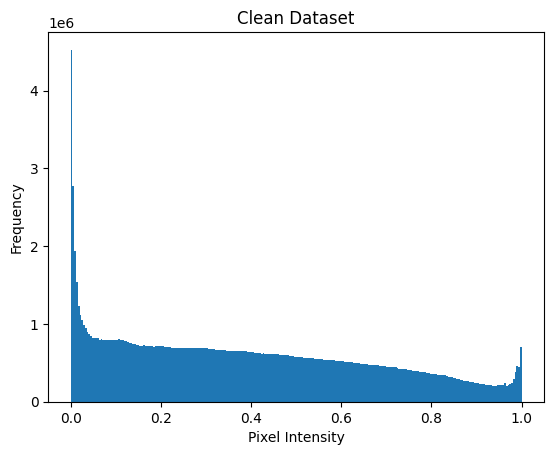

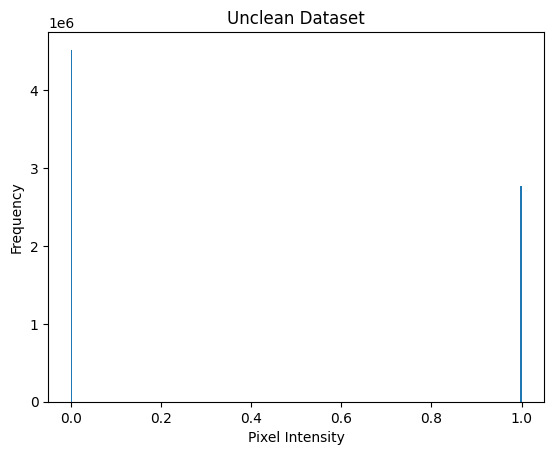

In [9]:
def plot_pixel_intensity(df, title, sample_size=1000):
    all_pixels = []
    
    # Use a generator to process images one at a time
    def pixel_generator():
        for img in df['image']:
            yield img.flatten()
    
    # Collect pixels from the generator
    pixel_gen = pixel_generator()
    for _ in range(min(sample_size, len(df))):
        all_pixels.append(next(pixel_gen))
    
    # Combine pixels
    all_pixels = np.concatenate(all_pixels)
    
    # Plot histogram
    plt.hist(all_pixels, bins=256, range=(0, 1))
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Example usage
plot_pixel_intensity(train_df, 'Clean Dataset')
plot_pixel_intensity(unclean_trained_df, 'Unclean Dataset')

t-SNE Visualization

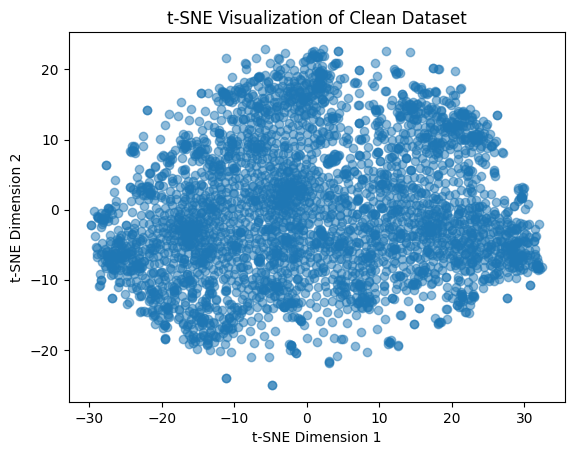

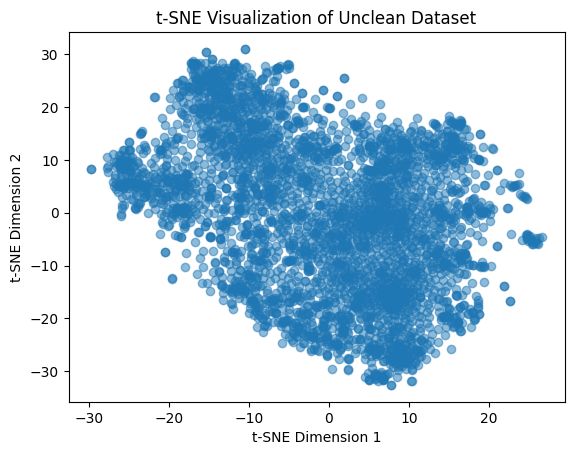

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def preprocess_data(df, column_name):
    """
    Preprocess the data by flattening images and handling potential issues.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the dataset.
    column_name (str): The name of the column containing the images.
    
    Returns:
    np.ndarray: A 2D array of flattened feature vectors.
    """
    features = []
    for img in df[column_name]:
        # Check if the image is a valid NumPy array
        if isinstance(img, np.ndarray):
            # Flatten the image and add to the features list
            features.append(img.flatten())
        else:
            # Handle invalid or missing data (e.g., by skipping or filling with zeros)
            print(f"Warning: Invalid or missing data found. Skipping this entry.")
            features.append(np.zeros((1, 1)).flatten())  # Replace with a zero vector or handle as needed
    
    return np.array(features)

def apply_tsne(features, title):
    """
    Apply t-SNE to the feature vectors and plot the results.
    
    Parameters:
    features (np.ndarray): A 2D array of flattened feature vectors.
    title (str): The title for the plot.
    """
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # perplexity is a hyperparameter
    reduced_data = tsne.fit_transform(features)
    
    # Plot the t-SNE results
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
    plt.title(title)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.show()

# Example usage with clean dataset
# Assume df_clean is a DataFrame with a column 'image' containing NumPy arrays
features_clean = preprocess_data(train_df, 'image')
apply_tsne(features_clean, 't-SNE Visualization of Clean Dataset')

# Example usage with unclean dataset
# Assume df_unclean is a DataFrame with a column 'image' containing potentially invalid data
features_unclean = preprocess_data(unclean_trained_df, 'image')
apply_tsne(features_unclean, 't-SNE Visualization of Unclean Dataset')

# Model Training

Since the data set is already divided into validation and training set. The model will be implemented using pytorch pipeline.

checking the size of train_df

In [11]:
# Check the shape of the first image in train_df
print(train_df['image'].iloc[0].shape)  # Should print (224, 224, 3)

(224, 224, 3)


2. Create a TensorFlow Pipeline
TensorFlow provides utilities like tf.data.Dataset to create efficient data pipelines. Here's how you can create a pipeline for your training and validation datasets:

Step 1: Convert DataFrames to TensorFlow Datasets
First, convert your train_df and validate_df into TensorFlow datasets.

In [12]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Assuming train_df and validate_df are already loaded as pandas DataFrames

# Convert train_df to a TensorFlow dataset
train_images = np.stack(train_df['image'].tolist())  # Convert list of numpy arrays to a single numpy array
train_labels = train_df['Flowers'].astype('category').cat.codes  # Convert flower names to integer labels

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

# Preprocess validation images (resize, normalize, etc.)
def preprocess_validation_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.resize(image, [224, 224])  # Resize to the same size as training images
    image = image / 255.0  # Normalize to [0, 1]
    return image

validation_images = np.stack([preprocess_validation_image(path) for path in validate_df['Image_Path']])
validation_labels = validate_df['Flowers'].astype('category').cat.codes

validation_dataset = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

Step 2: Shuffle, Batch, and Prefetch
Optimize the datasets for training by shuffling, batching, and prefetching.

In [13]:
# Shuffle, batch, and prefetch the training dataset
train_dataset = train_dataset.shuffle(buffer_size=len(train_df)).batch(32).prefetch(tf.data.AUTOTUNE)

# Batch and prefetch the validation dataset
validation_dataset = validation_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

4. Verify the Dataset Shapes
Before training, verify the shapes of the datasets to ensure they are correct.

In [14]:
# Check the shape of the first batch in train_dataset
for images, labels in train_dataset.take(1):
    print(images.shape)  # Should print (32, 224, 224, 3)
    print(labels.shape)  # Should print (32,)

# Check the shape of the first batch in validation_dataset
for images, labels in validation_dataset.take(1):
    print(images.shape)  # Should print (32, 224, 224, 3)
    print(labels.shape)  # Should print (32,)

(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)


3. Choose a Model
For image classification tasks, a pre-trained model like MobileNetV2, ResNet50, or EfficientNet is a good starting point. These models are already trained on large datasets like ImageNet and can be fine-tuned for your specific task.

Here’s how you can use MobileNetV2 as a base model:

In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Load MobileNetV2 as the base model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Add custom layers on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # 5 classes for flowers
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

4. Train the Model
Now, train the model using the training and validation datasets.

In [16]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 29s 139ms/step - accuracy: 0.6458 - loss: 0.9537 - val_accuracy: 0.8250 - val_loss: 0.4431
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8707 - loss: 0.3702 - val_accuracy: 0.8875 - val_loss: 0.3864
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8873 - loss: 0.3066 - val_accuracy: 0.8750 - val_loss: 0.3684
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9102 - loss: 0.2318 - val_accuracy: 0.8875 - val_loss: 0.3546
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9322 - loss: 0.2069 - val_accuracy: 0.9000 - val_loss: 0.3587
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9354 - loss: 0.1778 - val_accuracy: 0.8625 - val_loss: 0.5005
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9516 - loss: 0.1381 - val_accuracy: 0.9125 - val_loss: 0.3899
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9596 - loss: 0.1260 - val_ac

5. Evaluate the Model
After training, evaluate the model on the validation dataset to check its performance.

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_dataset)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9383 - loss: 0.2560
Validation Loss: 0.3830724358558655
Validation Accuracy: 0.8999999761581421


fine tuning

In [18]:
# Unfreeze the base model
base_model.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Continue training
history_fine = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=5
)

Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 79s 334ms/step - accuracy: 0.7525 - loss: 0.7611 - val_accuracy: 0.9000 - val_loss: 0.3902
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - accuracy: 0.8533 - loss: 0.3771 - val_accuracy: 0.9125 - val_loss: 0.3973
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 13s 119ms/step - accuracy: 0.8978 - loss: 0.2861 - val_accuracy: 0.9250 - val_loss: 0.3690
Epoch 4/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - accuracy: 0.9155 - loss: 0.2249 - val_accuracy: 0.9375 - val_loss: 0.3630
Epoch 5/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 13s 118ms/step - accuracy: 0.9316 - loss: 0.2051 - val_accuracy: 0.9250 - val_loss: 0.3575


Monitor Overfitting
During fine-tuning, keep an eye on the validation loss and accuracy. If the validation loss starts increasing while the training loss continues to decrease, it indicates overfitting. To mitigate overfitting:

Use data augmentation to artificially increase the size of your training dataset.

In [19]:
from tensorflow.keras import layers

# Define data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(224, 224, 3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

# Add augmentation to the model
model = models.Sequential([
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # 5 classes for flowers
])

# Recompile the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
